In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [73]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    # # rotation_range=0.45, # memutar gambar
                    # # width_shift_range=0.2,
                    # # height_shift_range=0.2,
                    # brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    # shear_range=0.2, # untuk mengatur skala image
                    # zoom_range=(0.2), # value < 1 akan zoom in
                    # fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    # #preprocessing_function=to_grayscale_then_rgb,
                    # horizontal_flip=True,
                    # vertical_flip =True,
                    validation_split = 0.2)

# folder_path = 'Augment/Temporary'

validation_datagen = ImageDataGenerator(rescale=1./255)

In [74]:
train_generator = train_datagen.flow_from_directory(
    "Dataset", # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=45,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    shuffle=True,
    class_mode='categorical',
    subset='training',
    # save_to_dir ='Augment/Temporary',
    # save_prefix='aug',
    # save_format='jpg'
)

validation_generator = train_datagen.flow_from_directory(
    "Dataset", # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=45,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    shuffle=True,
    class_mode='categorical',
    subset='validation'
)


Found 3070 images belonging to 5 classes.
Found 766 images belonging to 5 classes.


In [75]:
# for i in range(20):
image, label = train_generator.next()

In [76]:
class_name = os.listdir('Dataset')

In [77]:
class_name

['Abimanyu', 'Antasena', 'Arjuna', 'Bagong', 'Bima']

In [78]:
palette1 = list(reversed(sns.color_palette("mako", 7).as_hex()))
palette2 = list(reversed(sns.color_palette("viridis", 7).as_hex()))
palette3 = list(reversed(sns.color_palette("cubehelix", 7).as_hex()))
palette4 = list(reversed(sns.color_palette("icefire", 7).as_hex()))

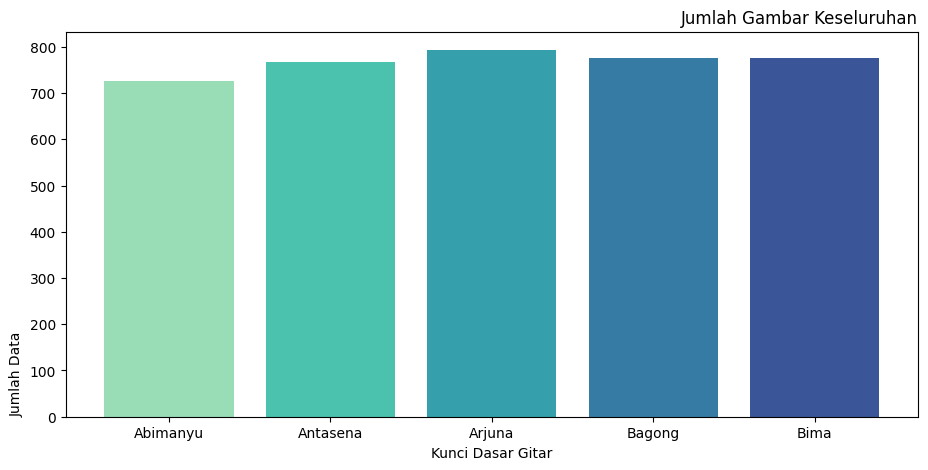

In [79]:
list_jumlah_file_all = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir('Dataset'):
    list_file_kelas = os.listdir(os.path.join('Dataset', kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_all.append(banyaknya_file) # masukkan jumlahnya ke dalam list
    
x = class_name # variabel yang berisi classname
y = list_jumlah_file_all # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette1)
plt.title('Jumlah Gambar Keseluruhan', loc='right')
plt.xlabel('Kunci Dasar Gitar')
plt.ylabel('Jumlah Data', loc='bottom')
plt.show()

In [80]:
len(image)

45

In [81]:
label

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1.

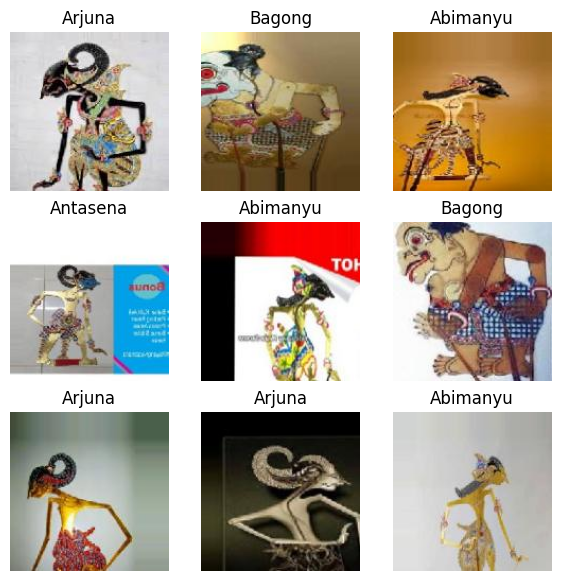

In [82]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")

Ukuran gambar : (45, 150, 150, 3)


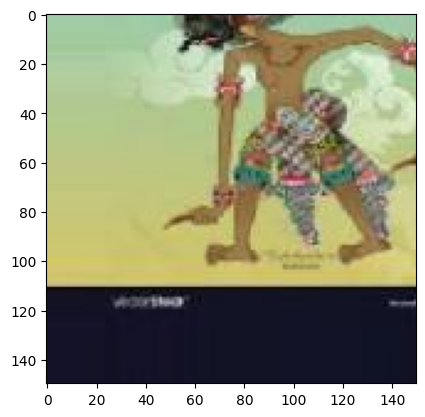

Ukuran gambar : (45, 150, 150, 3)


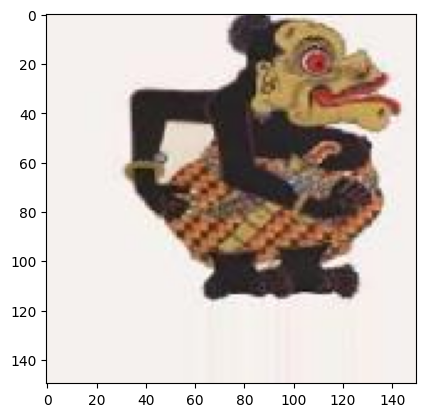

Ukuran gambar : (45, 150, 150, 3)


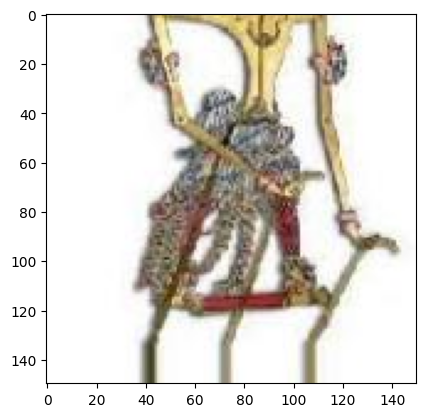

Ukuran gambar : (45, 150, 150, 3)


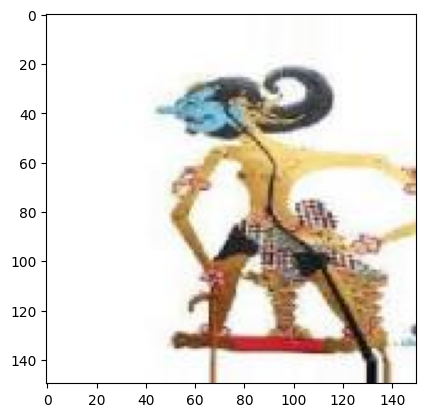

Ukuran gambar : (45, 150, 150, 3)


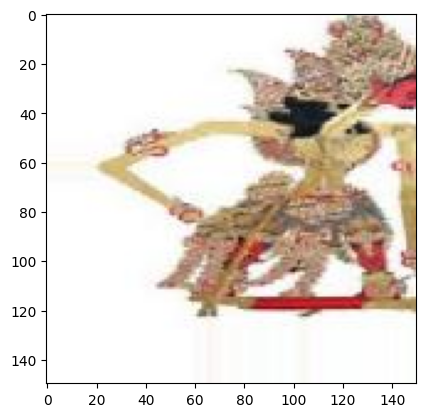

Ukuran gambar : (45, 150, 150, 3)


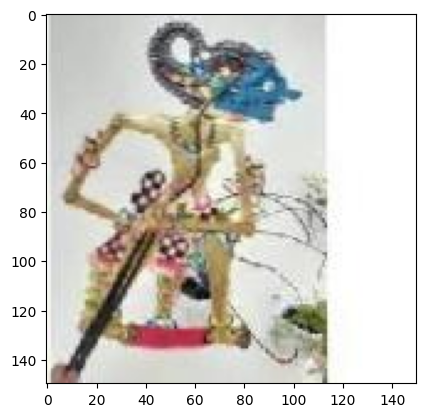

Ukuran gambar : (45, 150, 150, 3)


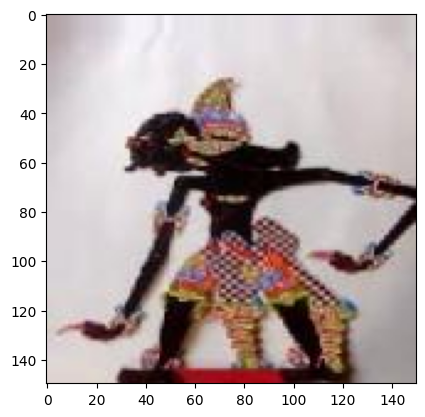

In [83]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

In [84]:
from tensorflow import keras

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input layer
    # Hidden Layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(), #menyatukan inputan yang memiliki dimensi
    tf.keras.layers.Dense(512, activation='relu'),
    # Hidden Layer
    tf.keras.layers.Dense(5, activation='softmax') # output Layer
])

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [87]:
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', #untuk classifikasi lebih dari 2 class
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [88]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=15)#jadi jika di 20 epoch selanjutnya itu tidak berubah maka diberentikan

In [89]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator, # untuk akurasi pengujian data
    callbacks=[monitor_val_acc]
)

Epoch 1/10
69/69 [==============================] - 58s 823ms/step - loss: 1.5974 - accuracy: 0.2391 - recall_4: 0.0042 - precision_4: 0.5652 - val_loss: 1.4649 - val_accuracy: 0.3616 - val_recall_4: 0.0313 - val_precision_4: 0.9231
Epoch 2/10
69/69 [==============================] - 60s 863ms/step - loss: 1.4319 - accuracy: 0.3857 - recall_4: 0.0948 - precision_4: 0.6062 - val_loss: 1.3529 - val_accuracy: 0.4269 - val_recall_4: 0.2454 - val_precision_4: 0.7642
Epoch 3/10
69/69 [==============================] - 60s 874ms/step - loss: 1.2389 - accuracy: 0.5026 - recall_4: 0.2531 - precision_4: 0.7241 - val_loss: 0.9798 - val_accuracy: 0.6149 - val_recall_4: 0.4243 - val_precision_4: 0.7794
Epoch 4/10
69/69 [==============================] - 63s 913ms/step - loss: 0.9894 - accuracy: 0.6163 - recall_4: 0.4296 - precision_4: 0.7722 - val_loss: 0.9539 - val_accuracy: 0.6749 - val_recall_4: 0.5561 - val_precision_4: 0.7731
Epoch 5/10
69/69 [==============================] - 62s 903ms/step -

In [90]:
model.save('Model.h5')

In [1]:
# from google.colab import files
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from keras.preprocessing import image
import matplotlib.image as mpimg
import numpy as np

In [26]:
filename = askopenfilename()
img = tf.keras.utils.load_img(filename, target_size=(150, 150))
imgplot = plt.imshow(img)
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)


image = np.vstack([x])
classes = model.predict(image, batch_size=32)

print(filename)
if classes[0][0] == 1:
  print('Abimanyu')
elif classes[0][1] == 1:
  print('Antasena')
elif classes[0][2] == 1:
  print('Arjuna')
elif classes[0][3] == 1:
  print('Bagong')
elif classes[0][4] == 1:
  print('Bima')
elif classes[0][5] == 1:
  print('Cepot')
elif classes[0][6] == 1:
  print('Gareng')
elif classes[0][7] == 1:
  print('Gatot Kaca')
elif classes[0][8] == 1:
  print('Hanoman')
else:
  print('Krisna')

# Transfer Learning

In [43]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(150,150,3))
base_model.trainable = False

In [48]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(tf.keras.layers.Dense(512, activation='relu'))
add_model.add(tf.keras.layers.Dense(1024, activation='relu'))
add_model.add(Dropout(0.5))      
add_model.add(Dense(3, 
                    activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(lr=1e-4, 
                                       momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_7 (Dense)             (None, 512)               1049088   
                                                                 
 dense_8 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 3)                 3075      
                                                      

In [49]:
history = model.fit(train_generator, 
                              epochs=30, 
                              shuffle=True, 
                              verbose=True,
                              validation_data=validation_generator,
                              callbacks=[monitor_val_acc])

Epoch 1/30
12/12 [==============================] - 13s 691ms/step - loss: 1.3038 - accuracy: 0.3168 - val_loss: 1.1565 - val_accuracy: 0.3483
Epoch 2/30
12/12 [==============================] - 7s 542ms/step - loss: 1.3408 - accuracy: 0.3140 - val_loss: 1.0765 - val_accuracy: 0.4270
Epoch 3/30
12/12 [==============================] - 7s 569ms/step - loss: 1.2884 - accuracy: 0.3416 - val_loss: 1.0989 - val_accuracy: 0.4607
Epoch 4/30
12/12 [==============================] - 8s 635ms/step - loss: 1.1453 - accuracy: 0.4463 - val_loss: 1.0874 - val_accuracy: 0.4494
Epoch 5/30
12/12 [==============================] - 7s 585ms/step - loss: 1.1985 - accuracy: 0.3664 - val_loss: 1.0547 - val_accuracy: 0.4045
Epoch 6/30
12/12 [==============================] - 7s 587ms/step - loss: 1.1775 - accuracy: 0.3967 - val_loss: 1.0298 - val_accuracy: 0.3820
Epoch 7/30
12/12 [==============================] - 7s 581ms/step - loss: 1.1466 - accuracy: 0.4270 - val_loss: 0.9772 - val_accuracy: 0.5281
Epoch